In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [33]:
df=pd.read_csv("bank-full.csv",delimiter=";")    #to arrange data into proper form

In [34]:
df.head()

age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0  unknown  no
1   44    technician   single  secondary  ...    -1         0  unknown  no
2   33  entrepreneur  married  secondary  ...    -1         0  unknown  no
3   47   blue-collar  married    unknown  ...    -1         0  unknown  no
4   33       unknown   single    unknown  ...    -1         0  unknown  no

[5 rows x 17 columns]

In [35]:
df.shape

(45211, 17)

In [36]:
df.describe()

age        balance  ...         pdays      previous
count  45211.000000   45211.000000  ...  45211.000000  45211.000000
mean      40.936210    1362.272058  ...     40.197828      0.580323
std       10.618762    3044.765829  ...    100.128746      2.303441
min       18.000000   -8019.000000  ...     -1.000000      0.000000
25%       33.000000      72.000000  ...     -1.000000      0.000000
50%       39.000000     448.000000  ...     -1.000000      0.000000
75%       48.000000    1428.000000  ...     -1.000000      0.000000
max       95.000000  102127.000000  ...    871.000000    275.000000

[8 rows x 7 columns]

In [37]:
df.info()   #as we can se there is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# **Plots of unique values of columns**

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

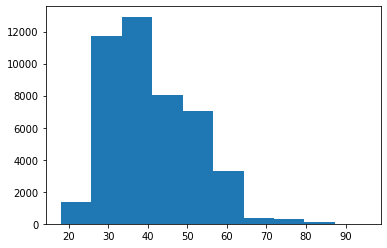

In [38]:
plt.hist(df["age"])  #in data set mostly age are between 25-45

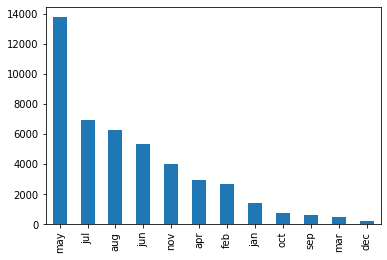

In [39]:
df["month"].value_counts().plot.bar()   # as we see most of last contact of client data from may and lowest at dec

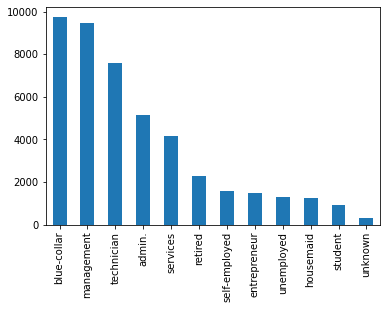

In [40]:
df["job"].value_counts().plot.bar()    # most of clients have from blue_collor, management and tec field

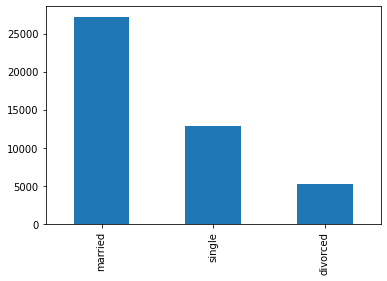

In [41]:
df["marital"].value_counts().plot.bar()    # are most of clients belongs to married cateory

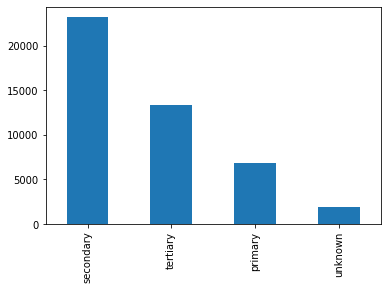

In [42]:
df["education"].value_counts().plot.bar()

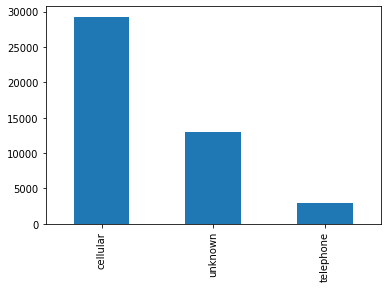

In [43]:
df["contact"].value_counts().plot.bar()

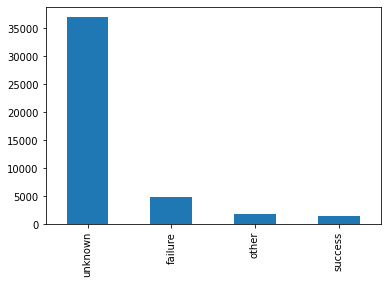

In [44]:
df["poutcome"].value_counts().plot.bar()

In [45]:
num_data = df.select_dtypes(include='number')
num_data.head()



age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0

# **Standrdizing a numeric columns from data set**

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dummy = scaler.fit_transform(num_data)
dummyy=pd.DataFrame(dummy,columns=["age","balance","day","duration","campaign","pdays","previous"])
dummyy

age   balance       day  duration  campaign     pdays  previous
0      1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453 -0.251940
1      0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453 -0.251940
2     -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453 -0.251940
3      0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453 -0.251940
4     -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453 -0.251940
...         ...       ...       ...       ...       ...       ...       ...
45206  0.947747 -0.176460  0.143418  2.791329  0.076230 -0.411453 -0.251940
45207  2.831227  0.120447  0.143418  0.768224 -0.246560 -0.411453 -0.251940
45208  2.925401  1.429593  0.143418  3.373797  0.721811  1.436189  1.050473
45209  1.512791 -0.228024  0.143418  0.970146  0.399020 -0.411453 -0.251940
45210 -0.370689  0.528364  0.143418  0.399328 -0.246560  1.476138  4.523577

[45211 rows x 7 columns]

# **Creating dummies of categorical data**

In [47]:
dummyy2=pd.get_dummies(df,columns=["marital","education","job","month","poutcome","contact"])
dummyy[["marital","education","job","month","poutcome","contact"]]=df[["marital","education","job","month","poutcome","contact"]]
dummyy


age   balance       day  ...  month  poutcome    contact
0      1.606965  0.256419 -1.298476  ...    may   unknown    unknown
1      0.288529 -0.437895 -1.298476  ...    may   unknown    unknown
2     -0.747384 -0.446762 -1.298476  ...    may   unknown    unknown
3      0.571051  0.047205 -1.298476  ...    may   unknown    unknown
4     -0.747384 -0.447091 -1.298476  ...    may   unknown    unknown
...         ...       ...       ...  ...    ...       ...        ...
45206  0.947747 -0.176460  0.143418  ...    nov   unknown   cellular
45207  2.831227  0.120447  0.143418  ...    nov   unknown   cellular
45208  2.925401  1.429593  0.143418  ...    nov   success   cellular
45209  1.512791 -0.228024  0.143418  ...    nov   unknown  telephone
45210 -0.370689  0.528364  0.143418  ...    nov     other   cellular

[45211 rows x 13 columns]

**converting binary data into 0 and 1**

In [48]:
df['default']=np.where(df['default'].str.contains("yes"),1,0)
df['housing']=np.where(df['housing'].str.contains("yes"),1,0)
df['loan']=np.where(df['loan'].str.contains("yes"),1,0)
df['y']=np.where(df['y'].str.contains("yes"),1,0)


In [49]:
dummyy[["default","housing","loan","y"]]=df[["default","housing","loan","y"]]
dummyy.head()                    

age   balance       day  duration  ...  default  housing  loan  y
0  1.606965  0.256419 -1.298476  0.011016  ...        0        1     0  0
1  0.288529 -0.437895 -1.298476 -0.416127  ...        0        1     0  0
2 -0.747384 -0.446762 -1.298476 -0.707361  ...        0        1     1  0
3  0.571051  0.047205 -1.298476 -0.645231  ...        0        1     0  0
4 -0.747384 -0.447091 -1.298476 -0.233620  ...        0        0     0  0

[5 rows x 17 columns]

In [50]:
dummyy.shape

(45211, 17)

**Creating dummies of categorical columns from data set**

In [51]:
dummyy=pd.get_dummies(dummyy,columns=["marital","education","job","month","poutcome","contact"])


In [52]:
dummyy.shape



(45211, 49)

**seprating data into x and y**

In [53]:
y=dummyy["y"]

In [54]:
del dummyy["y"]   #deleting y varible from dummy and storing into x
x=dummyy

In [55]:
from sklearn.linear_model import LogisticRegression
cl=LogisticRegression()
cl.fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [56]:
predicted_data=cl.predict(x)
predicted_data

array([0, 0, 0, ..., 1, 0, 0])

In [57]:
result= pd.DataFrame({'actual': y,
                         'predicted_prob': cl.predict(x)})
result

actual  predicted_prob
0           0               0
1           0               0
2           0               0
3           0               0
4           0               0
...       ...             ...
45206       1               1
45207       1               0
45208       1               1
45209       0               0
45210       0               0

[45211 rows x 2 columns]

In [58]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y,predicted_data)
print (c_m)

[[38943   979]
 [ 3458  1831]]


In [59]:
((38943+979)/(38943+979+3458+1831))*100

88.30151954170445

 **As we see accurancy of modle is 89% which is excellent**

Text(0, 0.5, 'True Positive Rate')

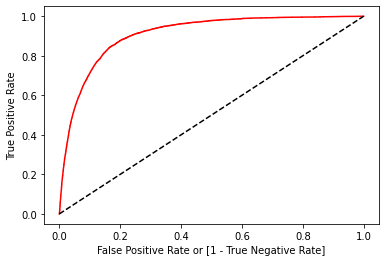

In [60]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, cl.predict_proba (x)[:,1])

auc = roc_auc_score(y, predicted_data)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [61]:
auc    #area undr curve

0.6608336932950432